In [44]:
import math
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

laser_wavelength = 633e-9

df = pd.read_csv('EXP04_ALL.csv')

near_df = (df.iloc[25:56,:]).sort_values(by='save_dist')
min_xwidth_near = near_df['save_xwidth'].min()
min_dist_near = near_df.loc[near_df['save_xwidth'] == min_xwidth_near, 'save_dist'].iloc[0]
near_df['save_dist'] -= min_dist_near
near_df['save_dist'] *= 1e-3
near_df['save_xwidth'] *= 1e-6

far_df = (df.iloc[58:,]).sort_values(by='save_dist')
min_xwidth_far = far_df['save_xwidth'].min()
min_dist_far = far_df.loc[far_df['save_xwidth'] == min_xwidth_far, 'save_dist'].iloc[0]
far_df['save_dist'] -= min_dist_far
far_df['save_dist'] *= 1e-3
far_df['save_xwidth'] *= 1e-6

In [76]:
x_values = np.array(near_df['save_dist'])
y_values = np.array(near_df['save_xwidth'])

In [77]:
# Gaussian beam width equation
def beam_width(z, w0):
    zR = (np.pi * (w0**2)) / laser_wavelength
    return w0 * np.sqrt(1 + (z / zR)**2)

In [78]:
params, covariance = curve_fit(beam_width, x_values, y_values, p0 = [min_xwidth_near])

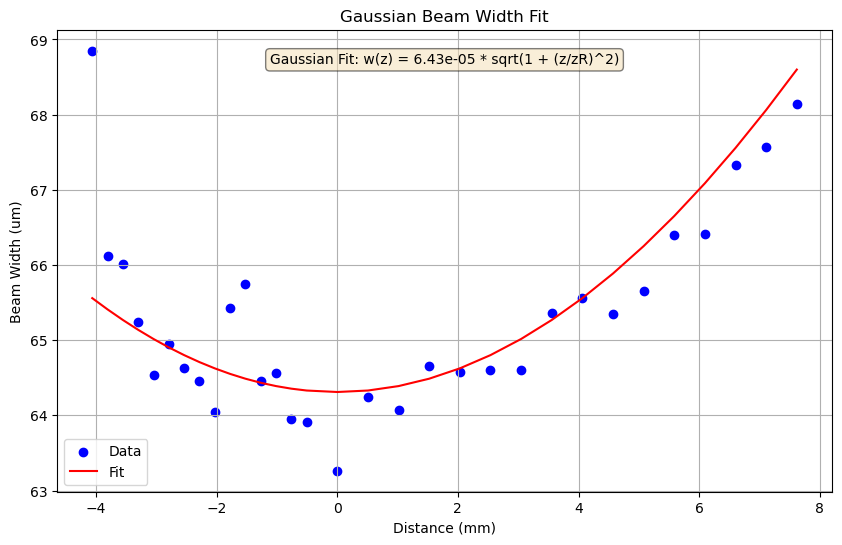

In [79]:
# Plotting the data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(x_values * 1e3, y_values * 1e6, label='Data', color='blue')  # Plot the data points

# Generate x values for the fit line
# x_fit = np.linspace(x_values.min(), x_values.max(), 500)
y_fit = beam_width(x_values, *params)

plt.plot(x_values * 1e3, y_fit * 1e6, label='Fit', color='red')  # Plot the fitted curve

# Display the fit equation on the plot
fit_eq = f"Gaussian Fit: w(z) = {params[0]:.2e} * sqrt(1 + (z/zR)^2)"
plt.text(0.5, 0.95, fit_eq, transform=plt.gca().transAxes, fontsize=10, horizontalalignment = 'center',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.xlabel('Distance (mm)')
plt.ylabel('Beam Width (um)')
plt.title('Gaussian Beam Width Fit')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
far_df

,save_xwidth,distance_mask,save_dist,save_offset,save_power,save_ywidth
69,0.000035,NaN,-0.00228,4.31280,547619.0,32.0403
68,0.000030,NaN,-0.00177,3.66358,522555.0,27.8681
67,0.000026,NaN,-0.00127,3.60976,540776.0,24.3764
79,0.000022,NaN,-0.00079,3.60891,539191.0,21.6639
66,0.000023,NaN,-0.00076,3.53096,525564.0,21.6044
78,0.000022,NaN,-0.00063,3.63937,533984.0,20.8495
77,0.000021,NaN,-0.00050,4.33480,527516.0,20.3519
76,0.000021,NaN,-0.00038,3.57754,552964.0,20.1726
70,0.000021,NaN,-0.00025,3.49137,527945.0,19.9302
58,0.000020,NaN,-0.00025,5.05215,499634.0,19.6849


In [66]:
# Fitting the far values
x_values_far = np.array(far_df['save_dist'])
y_values_far = np.array(far_df['save_xwidth'])

# Gaussian beam width equation
def beam_width(z, w0):
    zR = (np.pi * (w0**2)) / laser_wavelength
    return w0 * np.sqrt(1 + (z / zR)**2)

params, covariance = curve_fit(beam_width, x_values_far, y_values_far, p0 = [min_xwidth_far])

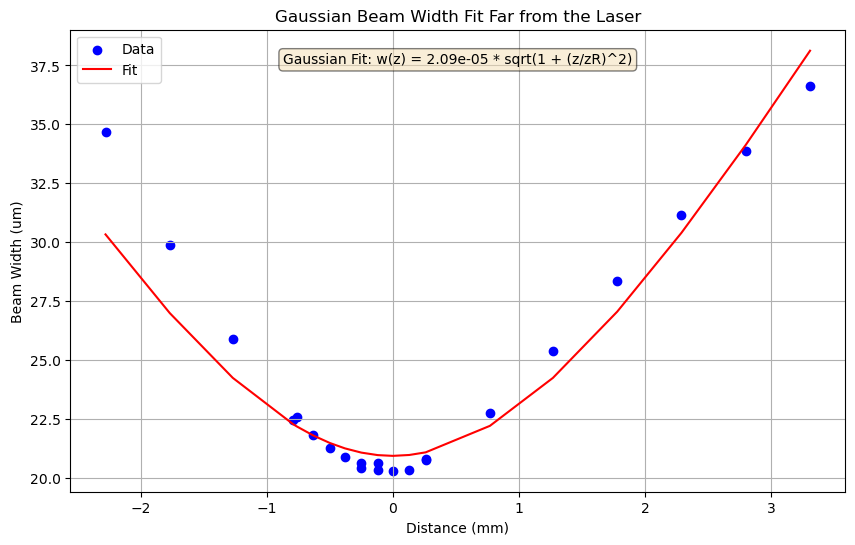

In [75]:
# Plotting the data and the fit for the far values
plt.figure(figsize=(10, 6))
plt.scatter(x_values_far * 1e3, y_values_far * 1e6, label='Data', color='blue')  # Plot the data points

y_fit = beam_width(x_values_far, *params)

plt.plot(x_values_far * 1e3, y_fit * 1e6, label='Fit', color='red')  # Plot the fitted curve

# Display the fit equation on the plot
fit_eq = f"Gaussian Fit: w(z) = {params[0]:.2e} * sqrt(1 + (z/zR)^2)"
plt.text(0.5, 0.95, fit_eq, transform=plt.gca().transAxes, fontsize=10, horizontalalignment = 'center',
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.xlabel('Distance (mm)')
plt.ylabel('Beam Width (um)')
plt.title('Gaussian Beam Width Fit Far from the Laser')
plt.legend()
plt.grid(True)
plt.show()